<a href="https://colab.research.google.com/github/Butnamfa/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# สมาชิก
6510210184 นางสาวปภาวดี บุญทัศโร

6510210513 นางสาวบุตรน้ำฟ้า รำพึงพวก


# 1.Collection Data

In [ ]:
#อนุญาตการเข้าถึง Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

## data1

In [ ]:
 #data : https://drive.google.com/file/d/1u8ueeWvRZ-gr65CJ07jR1VczPRXfQhQR/view?usp=sharing
 data1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mini project 331/data/news.csv")

In [ ]:
data1.head()

,Unnamed: 0,title,text,label,subject
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Local
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Business
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Health
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,World
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Business


In [ ]:
cols = list(data1.columns)
cols.remove('label')
cols.append('label')
data1 = data1[cols]

data1.head()


,Unnamed: 0,title,text,subject,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",Local,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,Business,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,Health,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",World,FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,Business,REAL


In [ ]:
data1 = data1.drop(columns=['Unnamed: 0'])
data1.head()

,title,text,subject,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",Local,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,Business,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,Health,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",World,FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,Business,REAL


In [ ]:
data1['label'] = data1['label'].map({'FAKE': 0, 'REAL': 1}).astype(int)
data1.head()

,title,text,subject,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",Local,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,Business,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,Health,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",World,0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,Business,1


## data2 & data3

In [ ]:
#https://drive.google.com/file/d/1l2Ox0sno3Ewh9oLQ_JJljLYUA9LABzYI/view?usp=sharing
#https://drive.google.com/file/d/1XRN8L8qYNVUeEm9BYCrT-caw0DRD0iB_/view?usp=sharing
data2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mini project 331/data/True.csv")
data3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mini project 331/data/Fake.csv")

In [ ]:
data2 ["label"] = 1  # ข่าวจริง = 1
data3["label"] = 0  # ข่าวปลอม = 0

In [ ]:
data2.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
data3.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
data2 = data2.drop(columns=['date'])
data2.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [ ]:
data3 = data3.drop(columns=['date'])
data3.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


## การรวมข้อมูลทั้ง 3 data

>> เนื่องจากข้อมูลเอานำมาจาก 3 เเหล่งเเละอยู่คนละไฟล์กันดังนั้นเพื่อที่จะนำไป ดำเนินการต่อจึงได้มีการรวมทั้ง 3 ไฟล์เข้าด้วยกัน

In [ ]:
# รวมข้อมูลทั้งสามชุด
data_news = pd.concat([data1, data2, data3], ignore_index=True)

# ดูโครงสร้างข้อมูลหลังรวม
print(data_news.head())

                                               title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text   subject  label  
0  Daniel Greenfield, a Shillman Journalism Fello...     Local      0  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  Business      0  
2  U.S. Secretary of State John F. Kerry said Mon...    Health      1  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...     World      0  
4  It's primary day in New York and front-runners...  Business      1  


In [ ]:
data_news.to_csv("Combined_News.csv", index=False)

In [ ]:
print(data_news["label"].value_counts())

label
0    26645
1    24588
Name: count, dtype: int64


# 2.Cleansing Data

In [ ]:
#data : https://drive.google.com/file/d/1ZUedIFAgviQEWaBRROpa6-2ksa6ymdks/view?usp=sharing
df_Cleansing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mini project 331/data/Combined_News.csv')

In [ ]:
df_Cleansing.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


## ตรวจสอบค่าที่หายไป (Missing Values)




In [ ]:
# ตรวจสอบค่าที่หายไปในแต่ละคอลัมน์
print(df_Cleansing.isnull().sum())

title      0
text       0
subject    0
label      0
dtype: int64


>> ไม่พบ Missing value

## ตรวจสอบข้อมูลซ้ำ (Duplicate Values)

In [ ]:
# ตรวจสอบและลบข้อมูลซ้ำ
print(df_Cleansing.duplicated().sum())

218


In [ ]:
df_Cleansing = df_Cleansing.drop_duplicates()  # ลบค่าที่ซ้ำ

In [ ]:
# ดูค่าซ้ำอีกครั้งหลังจากลบข้อมูลซ้ำ
print(df_Cleansing.duplicated().sum())

0


>> พบข้อมูลซ้ำ 218 เเถว เเละทำการลบ

## แปลงข้อความให้เป็นตัวพิมพ์เล็ก (Lowercase)

การแปลงข้อความทั้งหมดให้เป็นตัวพิมพ์เล็กช่วยให้โมเดลไม่สับสนระหว่างคำที่เขียนในรูปแบบต่างๆ เช่น "Apple" และ "apple"

In [ ]:
df_Cleansing['title'] = df_Cleansing['title'].str.lower()
df_Cleansing['text'] = df_Cleansing['text'].str.lower()

## ลบเครื่องหมายวรรคตอน (Punctuation) และตัวเลข

เครื่องหมายวรรคตอนและตัวเลขในข้อความอาจไม่สำคัญสำหรับการทำนายข่าวจริง/ปลอม

In [ ]:
import re
df_Cleansing['text'] = df_Cleansing['text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [ ]:
df_Cleansing['title'] = df_Cleansing['title'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

## การลบ Stopwords

Stopwords เป็นคำที่ไม่สำคัญ เช่น "the", "and", "is" ที่ไม่มีความหมายสำคัญในการทำนายข่าวปลอม

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
df_Cleansing['text'] = df_Cleansing['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

In [ ]:
df_Cleansing['title'] = df_Cleansing['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

## การทำ Tokenization

การ Tokenization คือการแยกข้อความออกเป็นคำหรือหน่วยย่อยๆ ที่สามารถใช้งานได้ในโมเดล เช่น แยกประโยคออกเป็นคำๆ

In [ ]:
!pip install nltk
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_Cleansing['tokenized_title'] = df_Cleansing['title'].apply(lambda x: word_tokenize(x))

In [ ]:
df_Cleansing[['title', 'tokenized_title']].head()

,title,tokenized_title
0,budget fight looms republicans flip fiscal script,"[budget, fight, looms, republicans, flip, fisc..."
1,military accept transgender recruits monday pe...,"[military, accept, transgender, recruits, mond..."
2,senior republican senator let mr mueller job,"[senior, republican, senator, let, mr, mueller..."
3,fbi russia probe helped australian diplomat ti...,"[fbi, russia, probe, helped, australian, diplo..."
4,trump wants postal service charge amazon shipm...,"[trump, wants, postal, service, charge, amazon..."


In [ ]:
df_Cleansing = df_Cleansing.drop(columns=['title'])

In [ ]:
df_Cleansing = df_Cleansing.rename(columns={'tokenized_title': 'title'})

In [ ]:
df_Cleansing['tokenized_text'] = df_Cleansing['text'].apply(lambda x: word_tokenize(x))

In [ ]:
df_Cleansing[['text', 'tokenized_text']].head()

,text,tokenized_text
0,washington reuters head conservative republica...,"[washington, reuters, head, conservative, repu..."
1,washington reuters transgender people allowed ...,"[washington, reuters, transgender, people, all..."
2,washington reuters special counsel investigati...,"[washington, reuters, special, counsel, invest..."
3,washington reuters trump campaign adviser geor...,"[washington, reuters, trump, campaign, adviser..."
4,seattlewashington reuters president donald tru...,"[seattlewashington, reuters, president, donald..."


In [ ]:
df_Cleansing = df_Cleansing.drop(columns=['text'])

In [ ]:
df_Cleansing = df_Cleansing.rename(columns={'tokenized_text': 'text'})

In [ ]:
df_Cleansing.head()

,subject,label,title,text
0,politicsNews,1,"[budget, fight, looms, republicans, flip, fisc...","[washington, reuters, head, conservative, repu..."
1,politicsNews,1,"[military, accept, transgender, recruits, mond...","[washington, reuters, transgender, people, all..."
2,politicsNews,1,"[senior, republican, senator, let, mr, mueller...","[washington, reuters, special, counsel, invest..."
3,politicsNews,1,"[fbi, russia, probe, helped, australian, diplo...","[washington, reuters, trump, campaign, adviser..."
4,politicsNews,1,"[trump, wants, postal, service, charge, amazon...","[seattlewashington, reuters, president, donald..."


In [ ]:
print(df_Cleansing["label"].value_counts())

label
0    26640
1    24375
Name: count, dtype: int64


In [ ]:
cols = list(df_Cleansing.columns)
cols.remove('subject')
cols.remove('label')
cols.extend(['subject', 'label'])
df_Explor = df_Cleansing[cols]
df_Explor.head()

,title,text,subject,label
0,"[budget, fight, looms, republicans, flip, fisc...","[washington, reuters, head, conservative, repu...",politicsNews,1
1,"[military, accept, transgender, recruits, mond...","[washington, reuters, transgender, people, all...",politicsNews,1
2,"[senior, republican, senator, let, mr, mueller...","[washington, reuters, special, counsel, invest...",politicsNews,1
3,"[fbi, russia, probe, helped, australian, diplo...","[washington, reuters, trump, campaign, adviser...",politicsNews,1
4,"[trump, wants, postal, service, charge, amazon...","[seattlewashington, reuters, president, donald...",politicsNews,1


## บันทึกข้อมูลที่ cleansing เเล้วเพื่อนำไปใช้ต่อ

In [ ]:
df_Cleansing.to_csv("cleaned_news_dataset.csv", index=False)

# 3.Exploratory Data Analysis (EDA)

In [ ]:
# data : https://drive.google.com/file/d/1B8-or9__7anks0-vNh08G-rwzPq1_MhQ/view?usp=sharing
import pandas as pd
df_Explor = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mini project 331/data/cleaned_news_dataset.csv')

In [ ]:
df_Explor.head()

,title,text,subject,label
0,"['budget', 'fight', 'looms', 'republicans', 'f...","['washington', 'reuters', 'head', 'conservativ...",politicsNews,1
1,"['military', 'accept', 'transgender', 'recruit...","['washington', 'reuters', 'transgender', 'peop...",politicsNews,1
2,"['senior', 'republican', 'senator', 'let', 'mr...","['washington', 'reuters', 'special', 'counsel'...",politicsNews,1
3,"['fbi', 'russia', 'probe', 'helped', 'australi...","['washington', 'reuters', 'trump', 'campaign',...",politicsNews,1
4,"['trump', 'wants', 'postal', 'service', 'charg...","['seattlewashington', 'reuters', 'president', ...",politicsNews,1


##  ตรวจสอบข้อมูลเบื้องต้น

In [ ]:
print(df_Explor.shape)

(51015, 4)


In [ ]:
print(df_Explor.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51015 entries, 0 to 51014
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    51015 non-null  object
 1   text     51015 non-null  object
 2   subject  51015 non-null  object
 3   label    51015 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.6+ MB
None


In [ ]:
df_Explor.isnull().sum()

,0
title,0
text,0
subject,0
label,0


In [ ]:
df_Explor.columns

Index(['title', 'text', 'subject', 'label'], dtype='object')

##  เปรียบเทียบจำนวนข่าวจริงและข่าวปลอม

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#palette =  sns.color_palette("pastel")
import seaborn as sns
palette = sns.color_palette("Set2")
sns.set_palette(palette)
palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

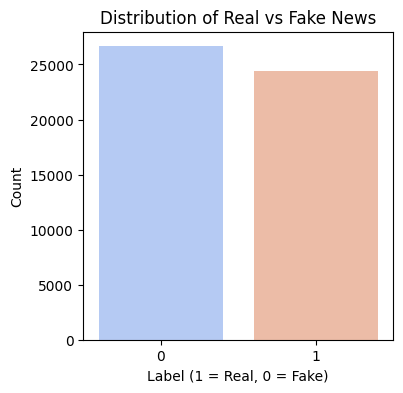

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='label', data=df_Explor, hue='label', palette='coolwarm', legend=False)
plt.title('Distribution of Real vs Fake News')
plt.xlabel('Label (1 = Real, 0 = Fake)')
plt.ylabel('Count')
plt.show()


>> สิ่งที่ได้จากกราฟ

- ข่าวจริง (Label 1 - สีฟ้า) มีจำนวนสูงกว่าข่าวปลอมเล็กน้อย
- ข่าวปลอม (Label 0 - สีส้ม) มีจำนวนใกล้เคียงกับข่าวจริง แต่มีจำนวนน้อยกว่า
- ข่าวจริงและข่าวปลอมมีจำนวนใกล้เคียงกัน → dataset ไม่มีปัญหา Class Imbalance

## วิเคราะห์จำนวนข่าวของเเต่ละประเภท

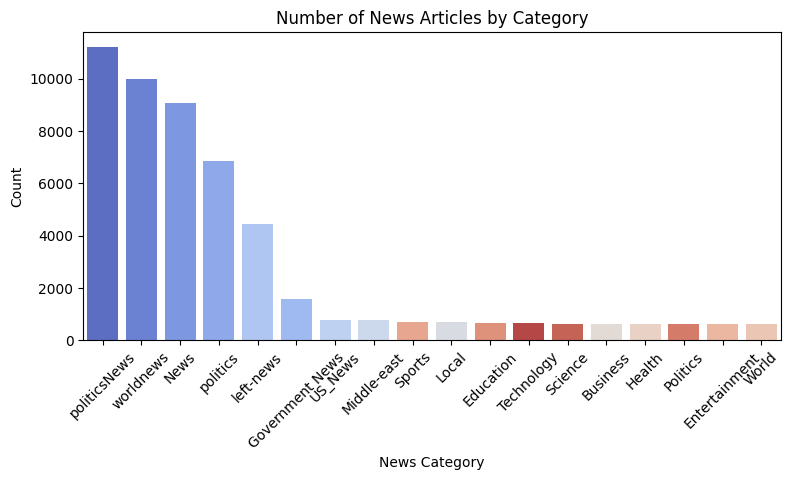

In [ ]:
plt.figure(figsize=(9, 4))
sns.countplot(data=df_Explor, x="subject", hue="subject", order=df_Explor["subject"].value_counts().index, palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.xlabel("News Category")
plt.ylabel("Count")
plt.title("Number of News Articles by Category")
plt.show()


>> สิ่งที่ได้จากกราฟ

- หมวดหมู่ที่มีข่าวมากที่สุด

>>"politicsNews" มีจำนวนข่าวสูงสุด (มากกว่า 10,000 ข่าว)

>>"worldnews" เป็นหมวดหมู่ที่มีข่าวจำนวนมากเป็นอันดับสอง (ประมาณ 10,000 ข่าว)

>>"News" เป็นหมวดหมู่ที่มีข่าวจำนวนมากรองลงมา

- หมวดหมู่ที่มีข่าวจำนวนปานกลาง

>> "left-news", และ "Government News"ข่าวเกี่ยวกับ การเมืองและรัฐบาล ก็ยังคงมีจำนวนมาก แต่ไม่เท่ากับหมวด "politicsNews"

>> ข่าว "US_News" และ "Middle-east" มีจำนวนปานกลาง

- หมวดหมู่ที่มีข่าวจำนวนน้อย
>> ข่าวด้าน กีฬา, เทคโนโลยี, วิทยาศาสตร์ และสุขภาพ มีจำนวนน้อยกว่าหมวดข่าวการเมืองและข่าวโลก

- Insight สำคัญ

>> ข่าวเกี่ยวกับการเมืองและข่าวโลกมีจำนวนสูงสุด → ข่าวในหมวดหมู่นี้อาจเป็น จุดสำคัญที่มีข่าวปลอมมากที่สุด

>> ข่าวหมวดเทคโนโลยี วิทยาศาสตร์ และสุขภาพ มีจำนวนน้อย → แต่อาจมีผลกระทบสูง เช่น ข่าวปลอมเกี่ยวกับวัคซีน หรือการค้นพบวิทยาศาสตร์ที่ไม่จริง

## การกระจายตัวของ Fake News และ Real News ตามหมวดหมู่ข่าว

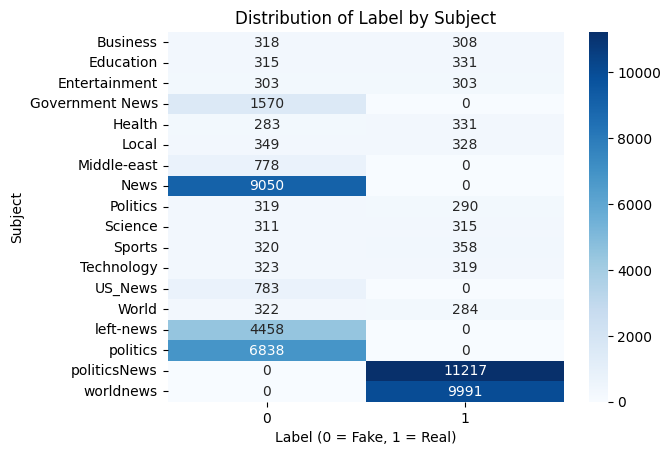

In [ ]:
# ใช้ pd.crosstab เพื่อตรวจสอบการกระจายของ label ตาม subject
subject_label_crosstab = pd.crosstab(df_Explor['subject'], df_Explor['label'])

# แสดงผลลัพธ์ในรูปแบบ heatmap
sns.heatmap(subject_label_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Distribution of Label by Subject')
plt.xlabel('Label (0 = Fake, 1 = Real)')
plt.ylabel('Subject')
plt.show()

>> สิ่งที่ได้จากกราฟ

- ข่าวทั่วไป (News), และข่าวรัฐบาล (Government News) มี Fake News ค่อนข้างสูง

- ข่าวหมวด "worldnews" และ "politicsNews" มีเฉพาะ Real News

- เศรษฐกิจ, เทคโนโลยี, กีฬา, และสุขภาพ มีการกระจายตัวของ Fake และ Real News ใกล้เคียงกัน

## วิเคราะห์คำที่พบบ่อยในข่าวปลอม vs ข่าวจริง

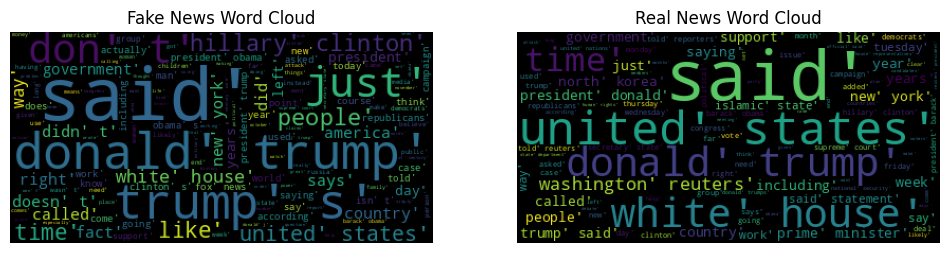

In [ ]:
from wordcloud import WordCloud

# แยกข้อความจากข่าวปลอมและข่าวจริง
fake_news = " ".join(df_Explor[df_Explor['label'] == 0]['text'])
real_news = " ".join(df_Explor[df_Explor['label'] == 1]['text'])

plt.figure(figsize=(12, 6))

# Word Cloud สำหรับข่าวปลอม
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color='black').generate(fake_news))
plt.axis('off')
plt.title('Fake News Word Cloud')

# Word Cloud สำหรับข่าวจริง
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color='black').generate(real_news))
plt.axis('off')
plt.title('Real News Word Cloud')
plt.show()


>> สิ่งที่ได้จากกราฟ

- คำที่พบบ่อยใน Fake News มีคำที่เกี่ยวข้องกับ Donald Trump และการเมืองมักใช้ชื่อของบุคคลสำคัญทางการเมือง
เเละการโต้แย้งหรือทฤษฎีสมคบคิด

- Real News มีการอ้างอิงถึงแหล่งข่าวที่น่าเชื่อถือมากขึ้น เช่น "Reuters"ใช้คำที่เป็นเชิงรายงานและเป็นกลาง

## วิเคราะห์แนวโน้มของคำที่พบบ่อยในหัวข้อข่าว

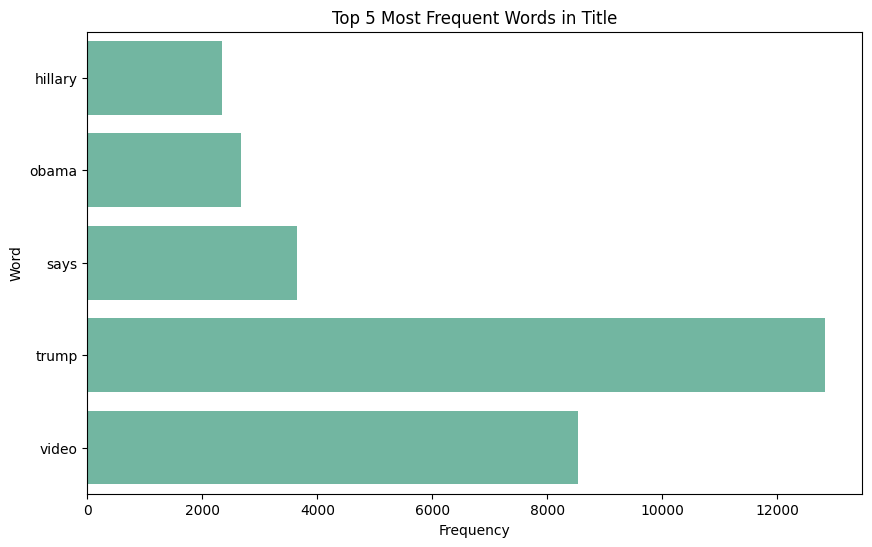

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

vectorizer = CountVectorizer(stop_words='english', max_features=5)  # ใช้ 5 คำที่พบบ่อยที่สุด
X_title = vectorizer.fit_transform(df_Explor['title'])

# หาความถี่ของคำจาก title
word_freq_title = dict(zip(vectorizer.get_feature_names_out(), X_title.sum(axis=0).tolist()[0]))

df_title_freq = pd.DataFrame(list(word_freq_title.items()), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_title_freq)
plt.title('Top 5 Most Frequent Words in Title')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

>> สิ่งที่ได้จากกราฟ

>> คำที่พบบ่อยที่สุดในหัวข้อข่าว (Title)

- "trump" – เป็นคำที่พบบ่อยที่สุดในหัวข้อข่าว แสดงให้เห็นว่าข่าวเกี่ยวกับ Donald Trump มีอิทธิพลสูง

- "video" – เป็นคำที่น่าสนใจ เพราะอาจหมายถึงข่าวที่อ้างอิงถึงวิดีโอ (เช่น คลิปวิดีโอที่ถูกแชร์) ซึ่งอาจเป็นทั้งข่าวจริงหรือข่าวปลอม

- "says" – บ่งบอกถึงการใช้คำพูดจากแหล่งข้อมูลหรือบุคคลสำคัญ ซึ่งเป็นลักษณะทั่วไปของพาดหัวข่าว

- "obama" และ "hillary" – ชื่อบุคคลทางการเมืองที่ปรากฏในข่าวบ่อย แสดงให้เห็นว่าข่าวการเมืองเป็นหัวข้อที่ได้รับความสนใจ

>> Insight จาก Title: ข่าวที่เกี่ยวกับ Donald Trump, Barack Obama, และ Hillary Clinton เป็นที่นิยมสูง
>> ข่าวที่มีคำว่า "video" อาจเกี่ยวข้องกับข่าวไวรัลหรือข่าวปลอมที่ใช้สื่อวิดีโอเพื่อโน้มน้าวความคิดเห็น

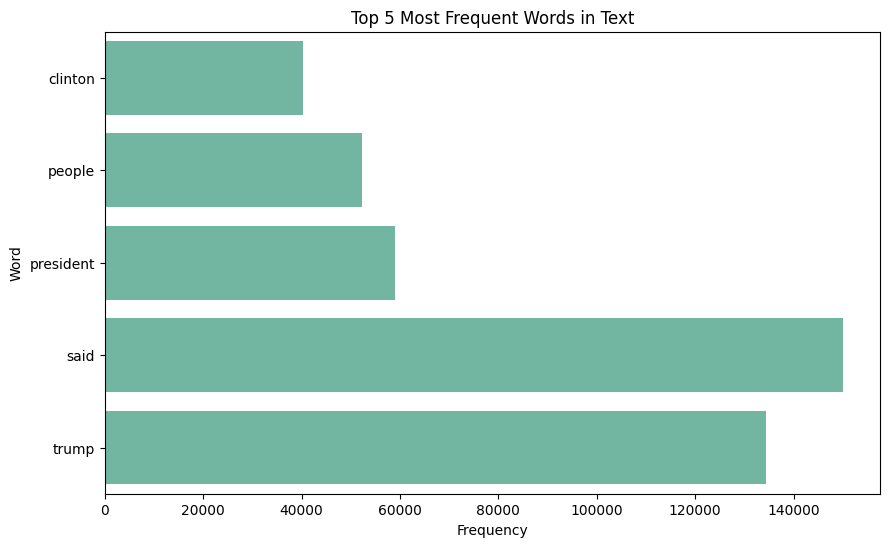

In [ ]:
X_text = vectorizer.fit_transform(df_Explor['text'])

# หาความถี่ของคำจาก text
word_freq_text = dict(zip(vectorizer.get_feature_names_out(), X_text.sum(axis=0).tolist()[0]))

# สร้าง DataFrame จากคำที่พบบ่อย
df_text_freq = pd.DataFrame(list(word_freq_text.items()), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_text_freq)
plt.title('Top 5 Most Frequent Words in Text')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

>> สิ่งที่ได้จากกราฟ

>> คำที่พบบ่อยที่สุดในเนื้อหาข่าว (Text)
- "trump" และ "said" – เป็นคำที่พบบ่อยมาก บ่งบอกว่าข่าวจำนวนมากรายงานเกี่ยวกับคำพูดของ Trump
- "president" – ชี้ให้เห็นว่าข่าวส่วนใหญ่เกี่ยวข้องกับประธานาธิบดี ซึ่งอาจรวมถึง Trump และ Obama
- "people" – อาจสะท้อนถึงข่าวที่เกี่ยวข้องกับประชาชนทั่วไป หรือความคิดเห็นของผู้คนในสังคม
  "clinton" – ชื่อของ Hillary Clinton ปรากฏบ่อยในเนื้อหาข่าว บ่งบอกถึงความสนใจในการเมืองของสหรัฐฯ

>> Insight จาก Text: ข่าวที่เกี่ยวกับ Donald Trump และบทบาทของเขาในฐานะประธานาธิบดี ได้รับความสนใจมาก
- คำว่า "said" แสดงว่าข่าวส่วนใหญ่นำเสนอในลักษณะของการรายงานคำพูดหรือคำแถลงการณ์
- "people" บ่งบอกว่าข่าวมีแนวโน้มที่จะเชื่อมโยงกับความคิดเห็นของประชาชนหรือผลกระทบต่อสังคม

## วิเคราะห์ความยาวในการพาดหัวข่าว

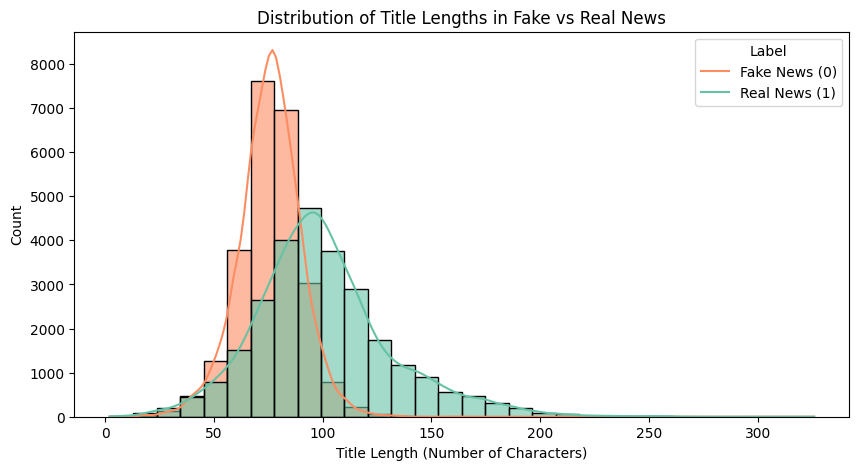

In [ ]:
# คำนวณความยาวของพาดหัวข่าว
df_Explor['title_length'] = df_Explor['title'].apply(len)

# สร้าง Histogram เพื่อดูการกระจายตัวของความยาวพาดหัวข่าว
plt.figure(figsize=(10, 5))
sns.histplot(data=df_Explor, x='title_length', hue='label', bins=30, kde=True, alpha=0.6)
plt.xlabel("Title Length (Number of Characters)")
plt.ylabel("Count")
plt.title("Distribution of Title Lengths in Fake vs Real News")
plt.legend(title="Label", labels=["Fake News (0)", "Real News (1)"])
plt.show()


>> สิ่งที่ได้จากกราฟ

- ข่าวปลอม (Fake News) มีแนวโน้มใช้พาดหัวข่าวที่สั้นกว่า

    > Peak (จุดสูงสุด) ของ Fake News อยู่ที่ประมาณ 50-70 ตัวอักษร

    > กราฟ Fake News (สีส้ม) แคบกว่า และลดลงเร็วหลังจาก 100 ตัวอักษร

- ข่าวจริง (Real News) มีแนวโน้มใช้พาดหัวข่าวที่ยาวกว่า

    > Peak (จุดสูงสุด) ของ Real News อยู่ที่ประมาณ 90-110 ตัวอักษร

    > การกระจายของข่าวจริงกว้างกว่า และมีพาดหัวข่าวที่ยาวเกิน 150 ตัวอักษรจำนวนมาก
- มีบางข่าวที่พาดหัวข่าวยาวมากกว่า 200 ตัวอักษร (Outliers)

    > พบว่าข่าวจริงมีการกระจายของพาดหัวข่าวที่กว้างกว่า
อาจเป็นเพราะข่าวจริงมักอธิบายรายละเอียดในพาดหัวมากกว่าข่าวปลอม

## วิเคราะห์ข่าวปลอมมักใช้คำเชิง Clickbait มากกว่าข่าวจริงหรือไม่?

In [ ]:
clickbait_words = ["shocking", "unbelievable", "must read", "you won’t believe"]
df_Explor['clickbait_count'] = df_Explor['title'].apply(lambda x: sum(word in x.lower() for word in clickbait_words))

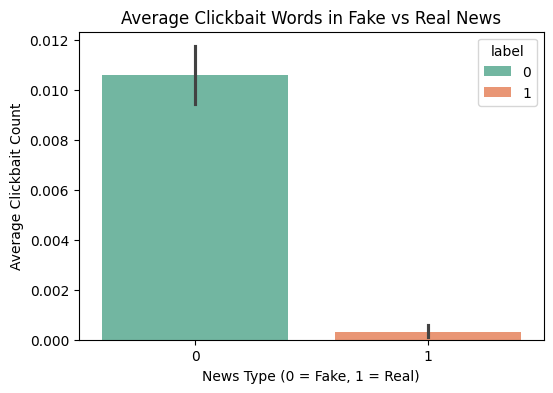

In [ ]:
import numpy as np
plt.figure(figsize=(6, 4))
sns.barplot(data=df_Explor, x='label', y='clickbait_count', hue='label')
plt.xlabel("News Type (0 = Fake, 1 = Real)")
plt.ylabel("Average Clickbait Count")
plt.title("Average Clickbait Words in Fake vs Real News")
plt.show()


>> สิ่งที่ได้จากกราฟ

- ข่าวปลอม (Fake News) มีแนวโน้มใช้ Clickbait มากกว่าข่าวจริง (Real News) อย่างชัดเจน

>> ค่าเฉลี่ยของ Clickbait Count ใน Fake News (~0.01) สูงกว่าข่าวจริงมาก

>> ข่าวจริง (Real News) มีการใช้ Clickbait น้อยมาก (~ใกล้ 0)

- แถบ Error Bar ของ Fake News สูงกว่าของ Real News

>> หมายความว่าในข่าวปลอม มีบางข่าวที่ใช้ Clickbait ในปริมาณสูง
ในข่าวจริง ค่าของ Clickbait Count กระจายต่ำและสม่ำเสมอมากกว่า


# 4.Model Building

In [ ]:
#data : https://drive.google.com/file/d/1B8-or9__7anks0-vNh08G-rwzPq1_MhQ/view?usp=sharing
import pandas as pd
df_model = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mini project 331/data/cleaned_news_dataset.csv')

In [ ]:
df_model.head()

,title,text,subject,label
0,"['budget', 'fight', 'looms', 'republicans', 'f...","['washington', 'reuters', 'head', 'conservativ...",politicsNews,1
1,"['military', 'accept', 'transgender', 'recruit...","['washington', 'reuters', 'transgender', 'peop...",politicsNews,1
2,"['senior', 'republican', 'senator', 'let', 'mr...","['washington', 'reuters', 'special', 'counsel'...",politicsNews,1
3,"['fbi', 'russia', 'probe', 'helped', 'australi...","['washington', 'reuters', 'trump', 'campaign',...",politicsNews,1
4,"['trump', 'wants', 'postal', 'service', 'charg...","['seattlewashington', 'reuters', 'president', ...",politicsNews,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# ใช้ LabelEncoder เพื่อแปลง 'subject' ให้เป็นตัวเลข
label_encoder = LabelEncoder()
df_model['subject'] = label_encoder.fit_transform(df_model['subject'])
df_model.head()


,title,text,subject,label
0,"['budget', 'fight', 'looms', 'republicans', 'f...","['washington', 'reuters', 'head', 'conservativ...",16,1
1,"['military', 'accept', 'transgender', 'recruit...","['washington', 'reuters', 'transgender', 'peop...",16,1
2,"['senior', 'republican', 'senator', 'let', 'mr...","['washington', 'reuters', 'special', 'counsel'...",16,1
3,"['fbi', 'russia', 'probe', 'helped', 'australi...","['washington', 'reuters', 'trump', 'campaign',...",16,1
4,"['trump', 'wants', 'postal', 'service', 'charg...","['seattlewashington', 'reuters', 'president', ...",16,1


เนื่องจาก title เเละ text ยังเป็นข้อความอยู่ไม่สามารถนำ Train Model ได้ จึงต้องทำให้เป็นตัวเลขก่อนด้วย Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# แปลงข้อความเป็นตัวเลข
vectorizer = TfidfVectorizer(max_features=500)  # เลือกใช้คำที่สำคัญที่สุด 500 คำ
X_title = vectorizer.fit_transform(df_model['title'])
X_text = vectorizer.fit_transform(df_model['text'])

print(X_title.shape)
print(X_text.shape)

# แปลงข้อมูลให้เป็น DataFrame
X_title_df = pd.DataFrame(X_title.toarray(), columns=vectorizer.get_feature_names_out())
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())

print(X_title_df.head())
print(X_text_df.head())


(51015, 500)
(51015, 500)
   able  access  according  accused  act  action  actually  added  \
0   0.0     0.0        0.0      0.0  0.0     0.0       0.0    0.0   
1   0.0     0.0        0.0      0.0  0.0     0.0       0.0    0.0   
2   0.0     0.0        0.0      0.0  0.0     0.0       0.0    0.0   
3   0.0     0.0        0.0      0.0  0.0     0.0       0.0    0.0   
4   0.0     0.0        0.0      0.0  0.0     0.0       0.0    0.0   

   administration  agency  ...  work  workers  working  world  wrote  year  \
0             0.0     0.0  ...   0.0      0.0      0.0    0.0    0.0   0.0   
1             0.0     0.0  ...   0.0      0.0      0.0    0.0    0.0   0.0   
2             0.0     0.0  ...   0.0      0.0      0.0    0.0    0.0   0.0   
3             0.0     0.0  ...   0.0      0.0      0.0    0.0    0.0   0.0   
4             0.0     0.0  ...   0.0      0.0      0.0    0.0    0.0   0.0   

   yearold  years  york  young  
0      0.0    0.0   0.0    0.0  
1      0.0    0.0   0.0 

## แบ่งข้อมูลเป็น Training และ Test Set

In [ ]:
from sklearn.model_selection import train_test_split

# รวม X_title_df, X_text_df, และ subject เป็น DataFrame เดียว
X = pd.concat([X_title_df, X_text_df, df_model['subject']], axis=1)
y = df_model['label']

# แบ่งข้อมูลเป็น training set และ test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(35710, 1001) (15305, 1001)


In [ ]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (35710, 1001)
Test set size: (15305, 1001)


## Build Model

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# กำหนด candidate สำหรับพารามิเตอร์ที่เราต้องการค้นหา
param_grid = {
    'C': [0.01, 0.1],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': [None, 'balanced'],
}


# สร้างโมเดล Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# ฝึก GridSearchCV ด้วย training set
grid_search.fit(X_train, y_train)

# แสดงพารามิเตอร์ที่ดีที่สุด
print(f"Best Hyperparameters: {grid_search.best_params_}")

# ใช้โมเดลที่ดีที่สุดจาก GridSearchCV ทำนายผลลัพธ์
best_model = grid_search.best_estimator_

# ทำนายผลลัพธ์
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# ประเมินผลโมเดล
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# แสดง classification report
print(classification_report(y_test, y_pred))

Accuracy: 94.95%
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7992
           1       0.96      0.93      0.95      7313

    accuracy                           0.95     15305
   macro avg       0.95      0.95      0.95     15305
weighted avg       0.95      0.95      0.95     15305



## ประเมินผลโมเดล

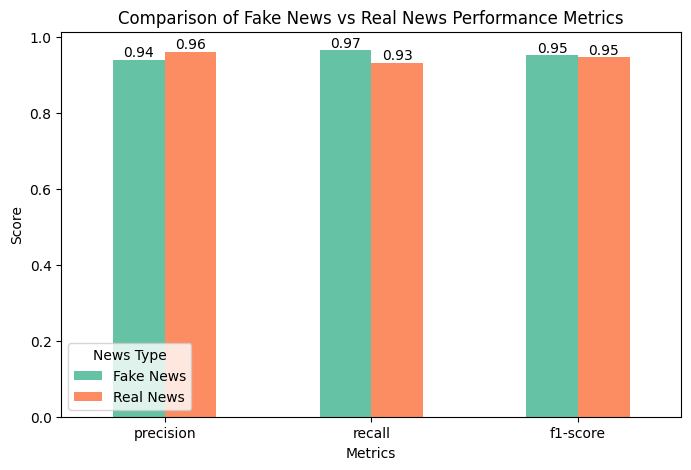

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


report_dict = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose().iloc[:2, :3]
df_report = df_report.T

palette = sns.color_palette("Set2")
sns.set_palette(palette)

fig, ax = plt.subplots(figsize=(8, 5))
df_report.plot(kind="bar", ax=ax, color=palette, rot=0)

ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Comparison of Fake News vs Real News Performance Metrics")
ax.legend(title="News Type", labels=["Fake News", "Real News"])

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

plt.show()


>> Real News มี Precision สูงกว่า Fake News

🔹 หมายความว่า เมื่อระบบบอกว่าข่าวจริงเป็นข่าวจริง มันถูกต้อง 96%

🔹 ส่วน Fake News มี Precision 94% แปลว่ามีบางกรณีที่ Fake News ถูกจำแนกผิด

>> Fake News มี Recall  สูงกว่า Real News

🔹 หมายความว่า ระบบสามารถตรวจจับ Fake News ได้ดีมาก (แทบไม่พลาด)

🔹 แต่ Real News มี Recall ต่ำกว่า แปลว่าอาจมีข่าวจริงบางส่วนที่ถูกมองว่าเป็น Fake News
>> Fake News และ Real News มี F1-Score เท่ากัน

🔹หมายความว่าโมเดลนี้สามารถทำนายข่าวปลอมและข่าวจริงได้ดีทั้งสองฝั่ง